# Predicting market sales

# Improting libraries

As sales order predicition ios an example of RPA so I have created a market sales predictor.

In [262]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importing dataset

In [263]:
dataset = pd.read_csv('Train_BigMart.csv')

In [264]:
dataset.isnull().sum().sort_values(ascending = False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Outlet_Sales               0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64

Understanding the dataset and dependencies


# Dividing dataset into numerical, categorical and target data and combine them after encoding

In [265]:
num_data = []
cat_data = []
target = []

for i,c in enumerate(dataset.dtypes):
  if c == object:
    cat_data.append(dataset.iloc[:, i])
  else:
    num_data.append(dataset.iloc[:, i])


In [266]:
num_data = pd.DataFrame(num_data).transpose()
cat_data = pd.DataFrame(cat_data).transpose()
target = num_data.iloc[:, -1].values
num_data = pd.DataFrame(num_data).drop('Item_Outlet_Sales', axis = 1)

In [267]:
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999.0
1,5.92,0.019278,48.2692,2009.0
2,17.50,0.016760,141.6180,1999.0
3,19.20,0.000000,182.0950,1998.0
4,8.93,0.000000,53.8614,1987.0


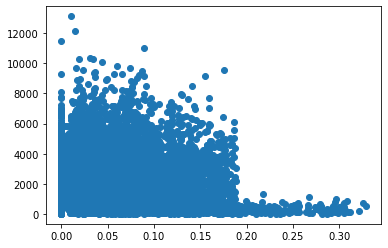

In [268]:
plt.scatter(num_data.iloc[:, 1], target)

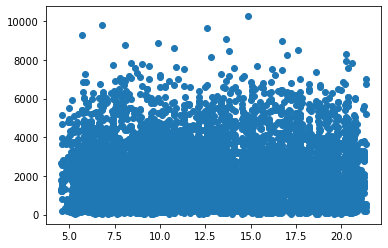

In [269]:
plt.scatter(num_data.iloc[:, 0], target)

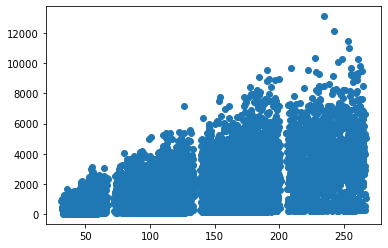

In [270]:
plt.scatter(num_data.iloc[:, 2], target)

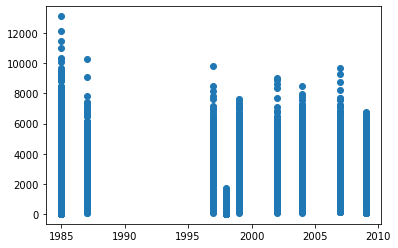

In [271]:
plt.scatter(num_data.iloc[:, 3], target)

In [272]:
cat_data.head

<bound method NDFrame.head of      Item_Identifier Item_Fat_Content              Item_Type  \
0              FDA15          Low Fat                  Dairy   
1              DRC01          Regular            Soft Drinks   
2              FDN15          Low Fat                   Meat   
3              FDX07          Regular  Fruits and Vegetables   
4              NCD19          Low Fat              Household   
...              ...              ...                    ...   
8518           FDF22          Low Fat            Snack Foods   
8519           FDS36          Regular           Baking Goods   
8520           NCJ29          Low Fat     Health and Hygiene   
8521           FDN46          Regular            Snack Foods   
8522           DRG01          Low Fat            Soft Drinks   

     Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
0               OUT049      Medium               Tier 1  Supermarket Type1  
1               OUT018      Medium             

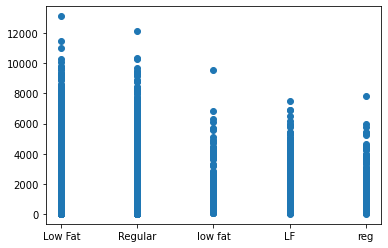

In [273]:
plt.scatter(cat_data.iloc[:, 1], target)

Fill missing Data


In [274]:
cat_data.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [275]:
num_data.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [276]:
num_data.interpolate()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.300,0.016047,249.8092,1999.0
1,5.920,0.019278,48.2692,2009.0
2,17.500,0.016760,141.6180,1999.0
3,19.200,0.000000,182.0950,1998.0
4,8.930,0.000000,53.8614,1987.0
...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0
8519,8.380,0.046982,108.1570,2002.0
8520,10.600,0.035186,85.1224,2004.0
8521,7.210,0.145221,103.1332,2009.0


In [277]:
num_data.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [278]:
for i in num_data:
  num_data[i].interpolate(method = 'linear')

In [279]:
num_data.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [280]:
num_data = num_data.interpolate()

In [281]:
num_data.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
dtype: int64

In [282]:
num_data.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.300,0.016047,249.8092,1999.0
1,5.920,0.019278,48.2692,2009.0
2,17.500,0.016760,141.6180,1999.0
3,19.200,0.000000,182.0950,1998.0
4,8.930,0.000000,53.8614,1987.0
5,10.395,0.000000,51.4008,2009.0
6,13.650,0.012741,57.6588,1987.0
7,14.925,0.127470,107.7622,1985.0
8,16.200,0.016687,96.9726,2002.0
9,19.200,0.094450,187.8214,2007.0


In [283]:
cat_data.fillna(method = 'bfill', inplace = True)

In [284]:
cat_data.isnull().sum().any()

False

In [285]:
cat_data

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,High,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Small,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


#Encoding

In [286]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_data:
  cat_data[i] = le.fit_transform(cat_data[i])

In [287]:
cat_data

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,1,4,9,1,0,1
1,8,2,14,3,1,2,2
2,662,1,10,9,1,0,1
3,1121,2,6,0,0,2,0
4,1297,1,9,1,0,2,1
...,...,...,...,...,...,...,...
8518,370,1,13,1,0,2,1
8519,897,2,0,7,2,1,1
8520,1357,1,8,6,2,1,1
8521,681,2,13,3,1,2,2


So it has 8523 rows and 7 columns 

In [288]:
df = pd.concat([cat_data, num_data, pd.DataFrame(target)], axis = 1)

In [289]:
df.head

<bound method NDFrame.head of       Item_Identifier  Item_Fat_Content  Item_Type  Outlet_Identifier  \
0                 156                 1          4                  9   
1                   8                 2         14                  3   
2                 662                 1         10                  9   
3                1121                 2          6                  0   
4                1297                 1          9                  1   
...               ...               ...        ...                ...   
8518              370                 1         13                  1   
8519              897                 2          0                  7   
8520             1357                 1          8                  6   
8521              681                 2         13                  3   
8522               50                 1         14                  8   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Weight  \
0               1       

In [290]:
df.isnull().sum().any()

False

In [291]:
df

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,0
0,156,1,4,9,1,0,1,9.300,0.016047,249.8092,1999.0,3735.1380
1,8,2,14,3,1,2,2,5.920,0.019278,48.2692,2009.0,443.4228
2,662,1,10,9,1,0,1,17.500,0.016760,141.6180,1999.0,2097.2700
3,1121,2,6,0,0,2,0,19.200,0.000000,182.0950,1998.0,732.3800
4,1297,1,9,1,0,2,1,8.930,0.000000,53.8614,1987.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,1,13,1,0,2,1,6.865,0.056783,214.5218,1987.0,2778.3834
8519,897,2,0,7,2,1,1,8.380,0.046982,108.1570,2002.0,549.2850
8520,1357,1,8,6,2,1,1,10.600,0.035186,85.1224,2004.0,1193.1136
8521,681,2,13,3,1,2,2,7.210,0.145221,103.1332,2009.0,1845.5976


In [292]:
df.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], inplace = True, axis = 1)

In [293]:
df

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,0
0,1,4,1,0,1,9.300,0.016047,249.8092,3735.1380
1,2,14,1,2,2,5.920,0.019278,48.2692,443.4228
2,1,10,1,0,1,17.500,0.016760,141.6180,2097.2700
3,2,6,0,2,0,19.200,0.000000,182.0950,732.3800
4,1,9,0,2,1,8.930,0.000000,53.8614,994.7052
...,...,...,...,...,...,...,...,...,...
8518,1,13,0,2,1,6.865,0.056783,214.5218,2778.3834
8519,2,0,2,1,1,8.380,0.046982,108.1570,549.2850
8520,1,8,2,1,1,10.600,0.035186,85.1224,1193.1136
8521,2,13,1,2,2,7.210,0.145221,103.1332,1845.5976


# Training Test Split

In [294]:
X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Computing values from all methods


# 1. Multiple Linear Regression


In [295]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [296]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [297]:
print(score)

0.5074702087220907


# 2. Polynomial Regression

In [298]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [299]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
lr.fit(X_poly, y_train)

LinearRegression()

In [300]:
y_pred = lr.predict(poly_reg.transform(X_test))
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.5964231382047542


# 3. Support Vector Machine

In [301]:
from sklearn.svm import SVR
svr = SVR(kernel = 'poly', degree = 2)
svr.fit(X_train, y_train)

SVR(degree=2, kernel='poly')

In [302]:
y_pred = svr.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

print(score)

0.2798251893319995


# 4. Decision Trees

In [303]:
from sklearn.tree  import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0, max_depth = 1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=0)

In [304]:
y_pred = dtr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.23420989530535374

# 5. Random Forest regression

In [305]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [306]:
y_pred = rfr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5345173797679714

# Model improvement

# Let us try feature scaling in order to get better results

In [307]:
from sklearn.preprocessing import  StandardScaler
ss = StandardScaler()
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)
y_train = ss.fit_transform(y_train)
y_test = ss.transform(y_test)

In [308]:
print(y_test)

[[-0.44149123]
 [-0.57306701]
 [-0.20098476]
 ...
 [ 0.41433698]
 [-1.14973593]
 [ 1.93468145]]


In [309]:
print(y_train)

[[ 1.36582118]
 [-0.63826925]
 [ 0.23317627]
 ...
 [-0.43446345]
 [ 0.59003164]
 [ 1.38690454]]


In [310]:
X_train

array([[1.00000000e+00, 6.00000000e+00, 1.00000000e+00, ...,
        1.06850000e+01, 8.72234200e-03, 1.23541400e+02],
       [1.00000000e+00, 1.40000000e+01, 1.00000000e+00, ...,
        1.87000000e+01, 1.46226250e-02, 5.20324000e+01],
       [2.00000000e+00, 0.00000000e+00, 2.00000000e+00, ...,
        1.58500000e+01, 1.21632721e-01, 6.06220000e+01],
       ...,
       [2.00000000e+00, 1.30000000e+01, 2.00000000e+00, ...,
        1.35000000e+01, 0.00000000e+00, 7.83960000e+01],
       [1.00000000e+00, 5.00000000e+00, 0.00000000e+00, ...,
        1.87000000e+01, 1.04890428e-01, 1.21407200e+02],
       [1.00000000e+00, 1.50000000e+01, 1.00000000e+00, ...,
        1.40000000e+01, 4.13553660e-02, 1.82063400e+02]])

In [311]:
df

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,0
0,1,4,1,0,1,9.300,0.016047,249.8092,3735.1380
1,2,14,1,2,2,5.920,0.019278,48.2692,443.4228
2,1,10,1,0,1,17.500,0.016760,141.6180,2097.2700
3,2,6,0,2,0,19.200,0.000000,182.0950,732.3800
4,1,9,0,2,1,8.930,0.000000,53.8614,994.7052
...,...,...,...,...,...,...,...,...,...
8518,1,13,0,2,1,6.865,0.056783,214.5218,2778.3834
8519,2,0,2,1,1,8.380,0.046982,108.1570,549.2850
8520,1,8,2,1,1,10.600,0.035186,85.1224,1193.1136
8521,2,13,1,2,2,7.210,0.145221,103.1332,1845.5976


In [312]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [313]:
print(X_train)

[[1.00000000e+00 6.00000000e+00 1.00000000e+00 ... 1.06850000e+01
  8.72234200e-03 1.23541400e+02]
 [1.00000000e+00 1.40000000e+01 1.00000000e+00 ... 1.87000000e+01
  1.46226250e-02 5.20324000e+01]
 [2.00000000e+00 0.00000000e+00 2.00000000e+00 ... 1.58500000e+01
  1.21632721e-01 6.06220000e+01]
 ...
 [2.00000000e+00 1.30000000e+01 2.00000000e+00 ... 1.35000000e+01
  0.00000000e+00 7.83960000e+01]
 [1.00000000e+00 5.00000000e+00 0.00000000e+00 ... 1.87000000e+01
  1.04890428e-01 1.21407200e+02]
 [1.00000000e+00 1.50000000e+01 1.00000000e+00 ... 1.40000000e+01
  4.13553660e-02 1.82063400e+02]]


# Re-Evaluating models 

# 1. Multiple Linear Regression

In [314]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [315]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [316]:
print(score)

0.2798251893319995


# 2. Polynomial Regression

In [317]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [318]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lr.fit(X_poly, y_train)

LinearRegression()

In [319]:
y_pred = lr.predict(poly_reg.transform(X_test))
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

-2642568.178655829


# 3. Support Vector Machine

In [320]:
from sklearn.svm import SVR
svr = SVR(kernel = 'poly', degree = 2)
svr.fit(X_train, y_train)

C:\Users\SAUMYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(degree=2, kernel='poly')

In [321]:
y_pred = svr.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

print(score)

-0.8887568154777372


# 4. Decision Trees

In [322]:
from sklearn.tree  import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0, max_depth = 1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=0)

In [323]:
y_pred = dtr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.2357469085008821

# 5. Random Forest regression

In [324]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

<ipython-input-324-6a114b33df32>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RandomForestRegressor()

In [325]:
y_pred = rfr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-1.2792205625300648

Since scaling resulted in poor performance, so let us revert the chnages

In [326]:
X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [327]:
df

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,0
0,1,4,1,0,1,9.300,0.016047,249.8092,3735.1380
1,2,14,1,2,2,5.920,0.019278,48.2692,443.4228
2,1,10,1,0,1,17.500,0.016760,141.6180,2097.2700
3,2,6,0,2,0,19.200,0.000000,182.0950,732.3800
4,1,9,0,2,1,8.930,0.000000,53.8614,994.7052
...,...,...,...,...,...,...,...,...,...
8518,1,13,0,2,1,6.865,0.056783,214.5218,2778.3834
8519,2,0,2,1,1,8.380,0.046982,108.1570,549.2850
8520,1,8,2,1,1,10.600,0.035186,85.1224,1193.1136
8521,2,13,1,2,2,7.210,0.145221,103.1332,1845.5976


Let us do the plotting again, in order to see which dependent variable can be removed in order to get better results

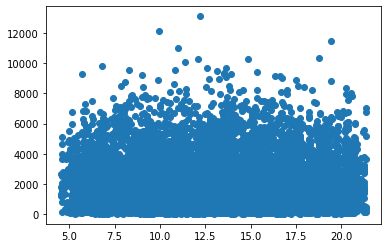

In [328]:
plt.scatter(X[:, -3], y)

In [329]:
df.drop('Item_Weight', inplace = True, axis = 1)

In [330]:
df

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility,Item_MRP,0
0,1,4,1,0,1,0.016047,249.8092,3735.1380
1,2,14,1,2,2,0.019278,48.2692,443.4228
2,1,10,1,0,1,0.016760,141.6180,2097.2700
3,2,6,0,2,0,0.000000,182.0950,732.3800
4,1,9,0,2,1,0.000000,53.8614,994.7052
...,...,...,...,...,...,...,...,...
8518,1,13,0,2,1,0.056783,214.5218,2778.3834
8519,2,0,2,1,1,0.046982,108.1570,549.2850
8520,1,8,2,1,1,0.035186,85.1224,1193.1136
8521,2,13,1,2,2,0.145221,103.1332,1845.5976


In [331]:
X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Recomputation of models

# 1. Multiple Linear Regression


In [332]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [333]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [334]:
print(score)

0.5074782834962331


# 2. Polynomial Regression

In [335]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [336]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
lr.fit(X_poly, y_train)

LinearRegression()

In [337]:
y_pred = lr.predict(poly_reg.transform(X_test))
from sklearn.metrics import r2_score
score1 = r2_score(y_test, y_pred)
print(score1)
lr.score(X_poly, y_train)

0.6002117979702951


0.6073100178846744

# 3. Support Vector Machine

In [338]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [339]:
y_pred = svr.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

print(score)
svr.score(X_train, y_train)

0.46777597798936277


0.46650038949905004

# 4. Decision Trees

In [340]:
from sklearn.tree  import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0, max_depth = 30, min_samples_leaf= 100)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, min_samples_leaf=100, random_state=0)

In [341]:
y_pred = dtr.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)
dtr.score(X_train, y_train)

0.5816379657766548


0.6149317523750002

# 5. Random Forest regression

In [342]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators= 400, max_depth = 6, min_samples_leaf= 100, n_jobs = 4)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=100, n_estimators=400,
                      n_jobs=4)

In [343]:
y_pred = rfr.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)
rfr.score(X_train, y_train)

0.5901226453666896


0.6072015096539858

In [344]:
df

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility,Item_MRP,0
0,1,4,1,0,1,0.016047,249.8092,3735.1380
1,2,14,1,2,2,0.019278,48.2692,443.4228
2,1,10,1,0,1,0.016760,141.6180,2097.2700
3,2,6,0,2,0,0.000000,182.0950,732.3800
4,1,9,0,2,1,0.000000,53.8614,994.7052
...,...,...,...,...,...,...,...,...
8518,1,13,0,2,1,0.056783,214.5218,2778.3834
8519,2,0,2,1,1,0.046982,108.1570,549.2850
8520,1,8,2,1,1,0.035186,85.1224,1193.1136
8521,2,13,1,2,2,0.145221,103.1332,1845.5976


So it has 8523 rows and 8 columns 

As you can see that we have done prediction from various ways and we also have got the result. 

But still, the accuracy is low, which can be dependent on many factors like:
1. Less data
2. More missing values
